In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
dat = pd.read_csv('train.csv', index_col='row_id')

In [3]:
test_periods = [
    ['1991-08-26 12:00:00', '1991-09-02 24:00:00'],
    ['1991-09-02 12:00:00', '1991-09-02 24:00:00'],
    ['1991-09-09 12:00:00', '1991-09-09 24:00:00'],
    ['1991-09-16 12:00:00', '1991-09-16 24:00:00']]

In [4]:
def preprocess(dat):
    time_mapper = {}
    ii = 0
    for h in range(24):
        for mm in ['00','20','40']:
            hh = '{0:02d}'.format(h)
            time_mapper[hh+':'+mm] = ii
            ii += 1

    dat['unique'] = dat['x'].astype(str) + dat['y'].astype(str) + dat['direction']
    dat['day'] = pd.to_datetime(dat['time']).dt.weekday
    dat['time_stamp'] = dat['time'].apply(lambda x:time_mapper[x.split()[1][:5]])

    tmp = dat.groupby(['unique','day','time_stamp']).agg({'congestion':np.median})
    median_mapper = tmp.to_dict()['congestion']
    
    congestions = dat[['unique','congestion','time']].set_index('time')
    congestions = congestions.groupby(['unique','time']).mean().unstack('unique')
    congestions.columns = congestions.columns.droplevel(0)
    
    cols = congestions.columns.to_list()
    for col in cols:
        col_new = col + '-1'
        congestions[col_new] = np.hstack((0, congestions[col][:-1]))
        col_new = col + '-2'
        congestions[col_new] = np.hstack((0, 0, congestions[col][:-2]))
    congestions = congestions.copy()
    congestions = congestions.drop(index=congestions.index[:2], axis=1)
    
    congestions['time_stamp'] = \
       pd.Series(congestions.index).apply(lambda x:time_mapper[x.split()[1][:5]]).values
    congestions['day'] = \
       pd.to_datetime(pd.Series(congestions.index)).dt.weekday.values
    
    return congestions, median_mapper, time_mapper

In [5]:
congestions, median_mapper, time_mapper = preprocess(dat)

/tmp/ipykernel_41306/3096527658.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  congestions[col_new] = np.hstack((0, 0, congestions[col][:-2]))
/tmp/ipykernel_41306/3096527658.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  congestions[col_new] = np.hstack((0, congestions[col][:-1]))


In [6]:
uniques = dat['unique'].unique()
print(uniques,len(uniques))

['00EB' '00NB' '00SB' '01EB' '01NB' '01SB' '01WB' '02EB' '02NB' '02SB'
 '02WB' '03EB' '03NB' '03NE' '03SB' '03SW' '03WB' '10EB' '10NB' '10NE'
 '10SB' '10SW' '10WB' '11EB' '11NB' '11SB' '11WB' '12EB' '12NB' '12NE'
 '12SB' '12SW' '12WB' '13EB' '13NB' '13NE' '13SB' '13SW' '13WB' '20EB'
 '20NB' '20SB' '20WB' '21EB' '21NB' '21NE' '21NW' '21SB' '21SE' '21SW'
 '21WB' '22EB' '22NB' '22NE' '22NW' '22SB' '22SE' '22SW' '22WB' '23EB'
 '23NB' '23NE' '23SB' '23SW' '23WB'] 65


In [7]:
congestions

unique,00EB,00NB,00SB,01EB,01NB,01SB,01WB,02EB,02NB,02SB,...,23NE-1,23NE-2,23SB-1,23SB-2,23SW-1,23SW-2,23WB-1,23WB-2,time_stamp,day
time,,,,,,,,,,,,,,,,,,,,,
1991-04-01 00:40:00,70.0,49.0,24.0,31.0,51.0,57.0,91.0,42.0,41.0,35.0,...,30.0,30.0,80.0,70.0,29.0,29.0,57.0,26.0,2,0
1991-04-01 01:00:00,70.0,49.0,24.0,36.0,51.0,46.0,49.0,39.0,44.0,58.0,...,30.0,30.0,79.0,80.0,29.0,29.0,48.0,57.0,3,0
1991-04-01 01:20:00,70.0,49.0,24.0,29.0,53.0,83.0,62.0,36.0,46.0,46.0,...,30.0,30.0,77.0,79.0,29.0,29.0,44.0,48.0,4,0
1991-04-01 01:40:00,70.0,49.0,24.0,15.0,48.0,38.0,39.0,36.0,51.0,43.0,...,30.0,30.0,79.0,77.0,29.0,29.0,44.0,44.0,5,0
1991-04-01 02:00:00,70.0,49.0,65.0,20.0,27.0,46.0,39.0,35.0,56.0,49.0,...,30.0,30.0,85.0,79.0,29.0,29.0,44.0,44.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991-09-30 10:20:00,43.0,29.0,60.0,23.0,63.0,61.0,42.0,47.0,51.0,56.0,...,25.0,31.0,69.0,66.0,24.0,35.0,33.0,41.0,31,0
1991-09-30 10:40:00,47.0,28.0,35.0,24.0,62.0,63.0,32.0,44.0,57.0,65.0,...,29.0,25.0,68.0,69.0,22.0,24.0,49.0,33.0,32,0
1991-09-30 11:00:00,40.0,31.0,53.0,22.0,65.0,58.0,38.0,44.0,60.0,62.0,...,25.0,29.0,70.0,68.0,20.0,22.0,47.0,49.0,33,0


In [24]:
def assemble(col):
    cols = [col for col in congestions.columns.to_list() if '-' in col]
    cols.append('time_stamp')
    cols.append('day')
    dat = congestions[cols].copy()  #the copy is needed
    dat['median'] = dat.apply(\
                        lambda x: median_mapper[(col, x['day'], \
                                                 x['time_stamp'])], axis=1).values
    dat['target'] = congestions[col].values
    
    trains, tests = [], []
    for period in test_periods:
        trains.append(dat[dat.index < period[0]])
        tests.append(dat[(dat.index >= period[0]) & (dat.index <= period[1])])
    
    return trains, tests, dat

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
import pickle

In [12]:
with open('baseline1_models.pickle','rb') as fid:
    regrs = pickle.load(fid)
regrs

{'00EB': RandomForestRegressor(criterion='absolute_error', min_samples_leaf=200,
                       n_jobs=48),
 '00NB': RandomForestRegressor(criterion='absolute_error', min_samples_leaf=10,
                       n_jobs=48),
 '00SB': RandomForestRegressor(criterion='absolute_error', min_samples_leaf=20,
                       n_jobs=48),
 '01EB': RandomForestRegressor(criterion='absolute_error', min_samples_leaf=20,
                       n_jobs=48),
 '01NB': RandomForestRegressor(criterion='absolute_error', min_samples_leaf=10,
                       n_jobs=48),
 '01SB': RandomForestRegressor(criterion='absolute_error', min_samples_leaf=10,
                       n_jobs=48),
 '01WB': RandomForestRegressor(criterion='absolute_error', min_samples_leaf=10,
                       n_jobs=48),
 '02EB': RandomForestRegressor(criterion='absolute_error', min_samples_leaf=20,
                       n_jobs=48),
 '02NB': RandomForestRegressor(criterion='absolute_error', min_samples_leaf=10,

In [13]:
import shap

In [17]:
uniques

array(['00EB', '00NB', '00SB', '01EB', '01NB', '01SB', '01WB', '02EB',
       '02NB', '02SB', '02WB', '03EB', '03NB', '03NE', '03SB', '03SW',
       '03WB', '10EB', '10NB', '10NE', '10SB', '10SW', '10WB', '11EB',
       '11NB', '11SB', '11WB', '12EB', '12NB', '12NE', '12SB', '12SW',
       '12WB', '13EB', '13NB', '13NE', '13SB', '13SW', '13WB', '20EB',
       '20NB', '20SB', '20WB', '21EB', '21NB', '21NE', '21NW', '21SB',
       '21SE', '21SW', '21WB', '22EB', '22NB', '22NE', '22NW', '22SB',
       '22SE', '22SW', '22WB', '23EB', '23NB', '23NE', '23SB', '23SW',
       '23WB'], dtype=object)

In [29]:
shap_values_all = {}

for col in uniques:
    _, _, train_all = assemble(col)
    X = train_all.drop(columns='target').values
    shap_values = shap.TreeExplainer(regrs[col]).shap_values(X)
    shap_values_all[col] = shap_values[:]

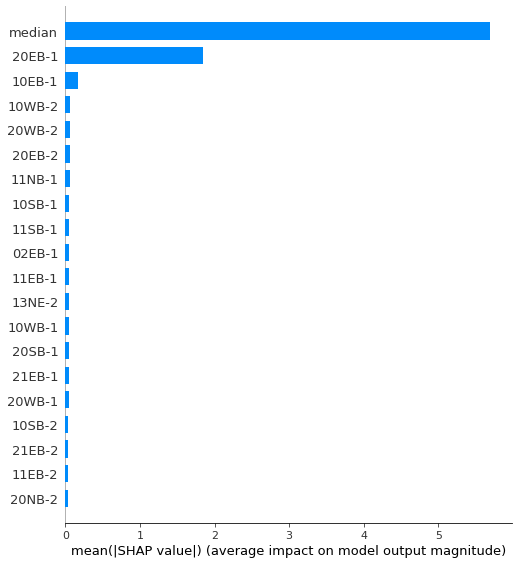

In [78]:
shap.summary_plot(shap_values_all['20EB'], plot_type='bar', \
                  features=train_all.drop(columns='target').columns)

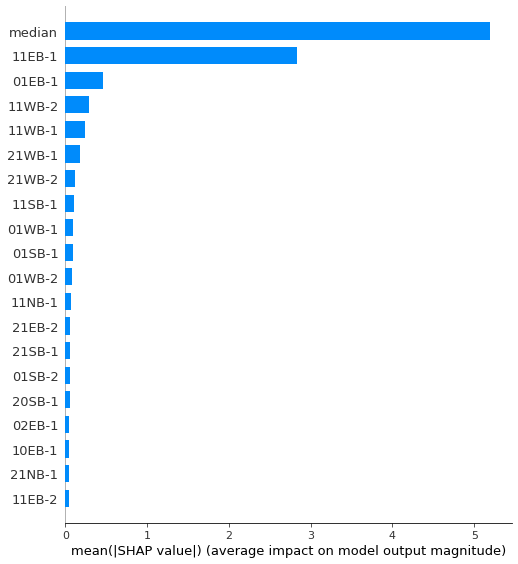

In [33]:
shap.summary_plot(shap_values_all['11EB'], plot_type='bar', \
                  features=train_all.drop(columns='target').columns)

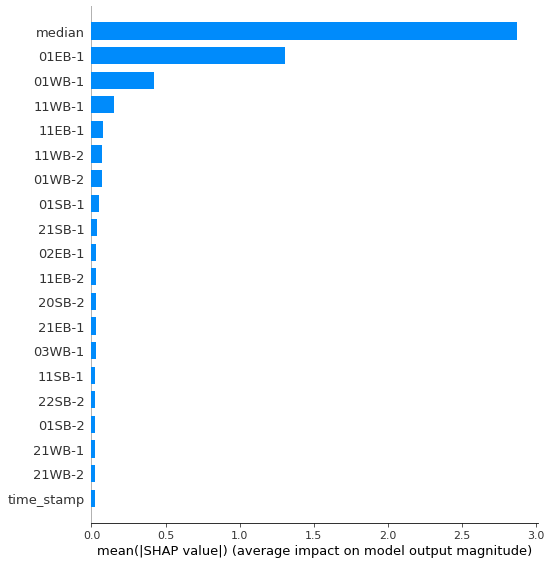

In [34]:
shap.summary_plot(shap_values_all['01EB'], plot_type='bar', \
                  features=train_all.drop(columns='target').columns)

In [35]:
with open('shap_tmp.pickle','wb') as fid:
    pickle.dump(shap_values_all, fid)